# WEEK 05
# Encounter 05 - Distribution Functions
# Project Challenge - Coin Flips

## Task Description

   1. Simulate a fair coin flip for 10 times and calculate the estimated probability of getting a head (number of times you got a head divided by 10). Repeat for 100, 1000 and 10000 times. How does the estimated probability changes ? How can we interpret that ?
   2. Plot the pmf of the Binomial distribution of **n=10** and **p=0.5**. (hint: start by sampling from the distribution for 100_000 times)
   3. Research other commonly used probability distributions and the random real life processes and events they are used to model.

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as sps
from scipy.stats import binom

#import matplotlib.pyplot as plt

### 1. Simulate a fair coin flip for 10 times

In [11]:
# flip results - list of possible values
flip_results_list = ['head', 'tail']

# sample list
coin_flip_results = []

for i in range(10):
    coin_flip = random.choice(flip_results_list)
    coin_flip_results.append(coin_flip)
    
coin_flip_results

['tail',
 'head',
 'tail',
 'head',
 'head',
 'head',
 'head',
 'tail',
 'head',
 'head']

In [15]:
# calculate the estimated probability of getting a head (number of times you got a head divided by 10)

values, counts = np.unique(coin_flip_results, return_counts=True)
values[0], counts[0]

('head', 7)

In [16]:
n=10
probanility_10 = counts[0]/n
probanility_10

0.7

### Define user function

In [41]:
def coin_flip_probability(n, side='head'):
    '''The function accepts a sample size (n) 
    and returns the estimated probability of getting a 'head' (by default) in coin flip'''
    
    # flip results - list of possible values
    flip_results_list = ['head', 'tail']

    # samples list of n random 'head' or 'tail' values
    coin_flip_results = np.random.choice(flip_results_list, size=n)
    
    # count the frequency of 'head' and 'tail' in the sample
    # 'values' is a list of unique random choice values
    # 'counts' is a list of reffered (by the same list index) frequency values
    values, counts = np.unique(coin_flip_results, return_counts=True)
    
    #calculate probability
    if values[0] == side:       #'head' by default
        probanility = counts[0]/n
    else:
        probanility = counts[1]/n
    
    return probanility
    

### TEMP function version (without numpy.random)

`def coin_flip_probability_tmp(n, side='head'):
    '''The function accepts a sample size (n) 
    and returns the estimated probability of getting a 'head' (by default) in coin flip'''
    
    # flip results - list of possible values
    flip_results_list = ['head', 'tail']

    # sample list
    coin_flip_results = []

    for i in range(n):
        coin_flip = random.choice(flip_results_list) 
    # replace with np.random. ...
        coin_flip_results.append(coin_flip)
    
    #count the frequency of 'head' and 'tail' in the sample
    values, counts = np.unique(coin_flip_results, return_counts=True)
    
    #calculate probability
    # add if for values[0] is side # 'head' by default
    probanility = counts[0]/n
    
    return probanility
`

In [37]:
# test for n=10
prob_10 = coin_flip_probability(10)
prob_10

0.4

### Simulate a fair coin flip for 100 times

In [38]:
prob_100 = coin_flip_probability(100)
prob_100

0.56

### Simulate a fair coin flip for 1000 times

In [39]:
prob_1000 = coin_flip_probability(1000)
prob_1000

0.525

### Simulate a fair coin flip for 10_000 times

In [40]:
prob_10000 = coin_flip_probability(10_000)
prob_10000

0.4991

### 2. Plot the pmf of the Binomial distribution of n=10 and p=0.5. 

(**hint:** start by sampling from the distribution for 100_000 times)

In [45]:
# CODE NOTES

heads_num = [10]*n                           # create list of n equal elements
heads_num_half = [x / 2 for x in heads_num]  # devide all list elenents by a specified value
heads_num_half

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

In [48]:
# debug
coin_flip_results = np.random.choice(flip_results_list, size=n)
coin_flip_results

array(['tail', 'tail', 'head', 'tail', 'tail', 'tail', 'tail', 'head',
       'tail', 'head'], dtype='<U4')

In [49]:
# debug
values, counts = np.unique(coin_flip_results, return_counts=True)
values, counts

(array(['head', 'tail'], dtype='<U4'), array([3, 7], dtype=int64))

In [58]:
# sampling 10 flips 10_000 times

n = 10 # sample size
m = 100_000 # number of times to get a sample(n)

flip_results_list = ['head', 'tail'] # list of possible results while coin flipping
heads_num = [0]*n # the list to store number of cases for aech k-heads variant (from 1 head to 10 heads in a sample)

for i in range(m):
    # samples list of n random 'head' or 'tail' values
    coin_flip_results = np.random.choice(flip_results_list, size=n)
    
    # count the frequency of 'head' and 'tail' in the sample
    # 'values' is a list of unique random choice values
    # 'counts' is a list of reffered (by the same list index) frequency values
    values, counts = np.unique(coin_flip_results, return_counts=True)
    
    # if in this sample was k 'heads' increase k-element of heads_num by 1
    if 'head' in values:  # to be able to skip case when there are all 10 tails in a sample
        if values[0] == 'head':
            heads_num[counts[0]-1] += 1 # if 'head' is the first value in 'values' list
        else:
            heads_num[counts[1]-1] += 1 # if 'head' is the second value in 'values' list
        
probability = [x / m for x in heads_num]

# display results
heads_num, probability

([1019, 4486, 11676, 20416, 24588, 20431, 11849, 4452, 896, 91],
 [0.01019,
  0.04486,
  0.11676,
  0.20416,
  0.24588,
  0.20431,
  0.11849,
  0.04452,
  0.00896,
  0.00091])

In [60]:
probability

[0.01019,
 0.04486,
 0.11676,
 0.20416,
 0.24588,
 0.20431,
 0.11849,
 0.04452,
 0.00896,
 0.00091]

In [62]:
# converting probabilities list to a dataframe
df_probability = pd.DataFrame(probability)

In [63]:
# adding column name to DataFrame
df_probability.columns=['k_heads_probabilty']

,k_heads_probabilty
0,0.01019
1,0.04486
2,0.11676
3,0.20416
4,0.24588
5,0.20431
6,0.11849
7,0.04452
8,0.00896
9,0.00091


In [65]:
# adding 'heads_quantity' column to the dataframe (k)
df_probability['heads_quantity'] = [x+1 for x in range(10)]
df_probability

,k_heads_probabilty,heads_quantity
0,0.01019,1
1,0.04486,2
2,0.11676,3
3,0.20416,4
4,0.24588,5
5,0.20431,6
6,0.11849,7
7,0.04452,8
8,0.00896,9
9,0.00091,10


In [85]:
# representing heads_quantity as a DataFrame
df_heads_quantity = pd.DataFrame(heads_num)

In [87]:
df_heads_quantity.columns = ['cases_num']
df_heads_quantity['heads_quantity'] = [x+1 for x in range(10)]

In [90]:
# plotting displot - DOESN'T WORK
# sns.displot(data = df_heads_quantity, x= 'heads_quantity', stat = 'probability')

Text(0.5, 1.0, 'The PMF of the Binomial distribution of n=10 and p=0.5')

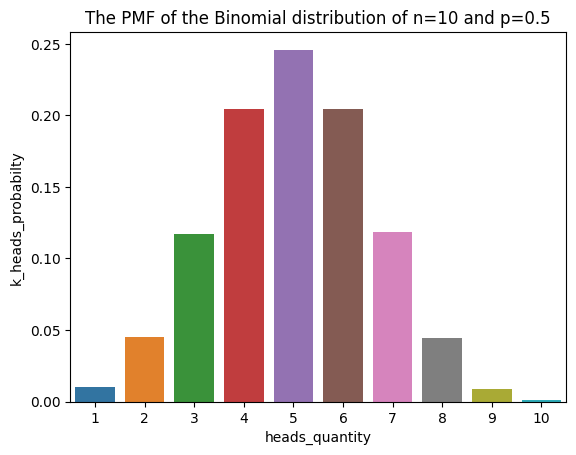

In [94]:
# plotting 
sns.barplot(data=df_probability, x='heads_quantity', y='k_heads_probabilty');
plt.title('The PMF of the Binomial distribution of n=10 and p=0.5')

### 3. Research other commonly used probability distributions and the random real life processes and events they are used to model.

In [ ]:
# incomplete task